# [Tarea 09] Ejercicios Unidad 04-A-B | Eliminación gaussiana vs Gauss-Jordan

* Nombre:Luis Lema
* Curso:Gr1cc
* Materia: Metodos Númericos
* Fecha: 07/01/2024

## DESARROLLO

# Ejercicio 1

# Sistemas Lineales

Para cada uno de los siguientes sistemas lineales, obtenga, de ser posible, una solución con métodos gráficos.
Explique los resultados desde un punto de vista geométrico.

- a. 𝑥₁ + 2𝑥₂ = 0
- b. 𝑥₁ + 2𝑥₂ = 3
- c. 2𝑥₁ + 𝑥₂ = −1
- d. 2𝑥₁ + 𝑥₂ + 𝑥₃ = 1
- e. 𝑥₁ − 𝑥₂ = 0
- f. −2𝑥₁ − 4𝑥₂ = 6
- g. 𝑥₁ + 𝑥₂ = 2
- h. 2𝑥₁ + 4𝑥₂ − 𝑥₃ = −1
- i. 𝑥₁ − 3𝑥₂ = 5


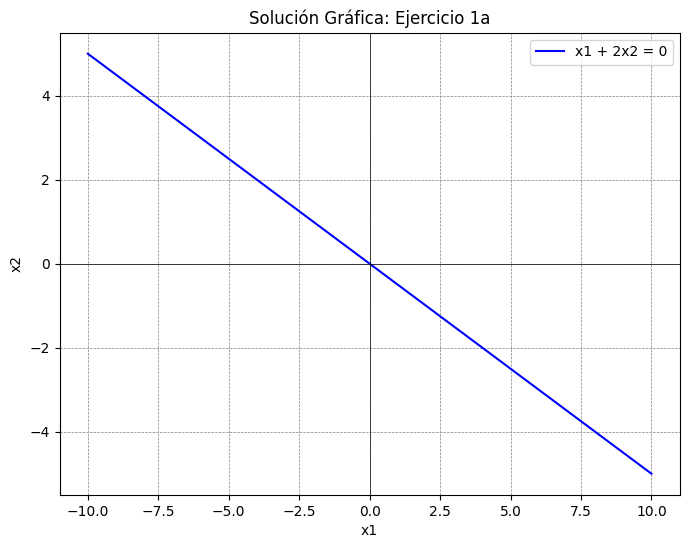

El sistema x1 + 2x2 = 0 representa una única recta en el plano.
Cualquier punto sobre la recta es solución al sistema, por lo que tiene infinitas soluciones.


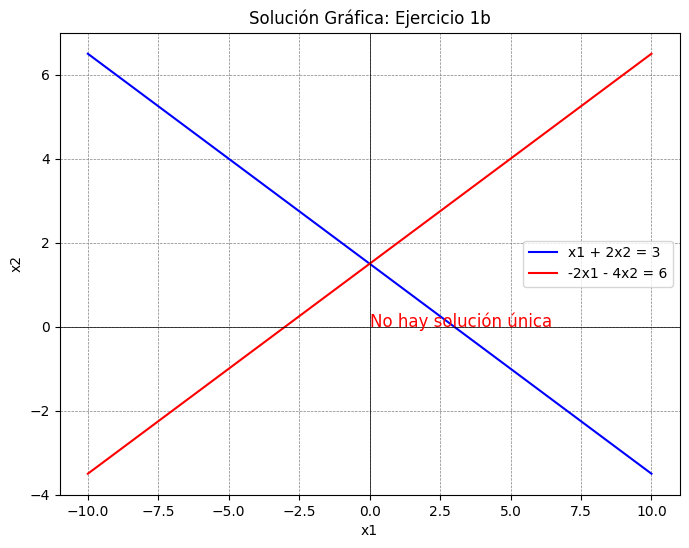

El sistema no tiene solución, ya que las dos rectas son paralelas o coinciden completamente.
Esto implica que no hay un punto de intersección que satisfaga ambas ecuaciones simultáneamente.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Ejercicio 1a: Resolver y graficar el sistema lineal x1 + 2x2 = 0
# Definir las funciones de las rectas
x = np.linspace(-10, 10, 400)  # Valores para el eje x
y1 = -x / 2  # Recta x1 + 2x2 = 0

# Graficar
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label='x1 + 2x2 = 0', color='blue')

# Añadir etiquetas y configuración
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title('Solución Gráfica: Ejercicio 1a')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

# Determinar si es posible resolver el sistema
def explicar_resultado_1a():
    print("El sistema x1 + 2x2 = 0 representa una única recta en el plano.")
    print("Cualquier punto sobre la recta es solución al sistema, por lo que tiene infinitas soluciones.")

explicar_resultado_1a()

# Ejercicio 1b: Resolver y graficar el sistema lineal x1 + 2x2 = 3 y -2x1 - 4x2 = 6
# Definir las funciones de las rectas
y2 = (3 - x) / 2  # Recta x1 + 2x2 = 3
y3 = (-6 - 2*x) / -4  # Recta -2x1 - 4x2 = 6

# Graficar
plt.figure(figsize=(8, 6))
plt.plot(x, y2, label='x1 + 2x2 = 3', color='blue')
plt.plot(x, y3, label='-2x1 - 4x2 = 6', color='red')

# Calcular el punto de intersección
A = np.array([[1, 2], [-2, -4]])
b = np.array([3, 6])
try:
    solution = np.linalg.solve(A, b)
    plt.scatter(solution[0], solution[1], color='purple', label=f'Solución: {solution}')
    solucion_posible = True
except np.linalg.LinAlgError:
    plt.text(0, 0, 'No hay solución única', fontsize=12, color='red')
    solucion_posible = False

# Añadir etiquetas y configuración
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title('Solución Gráfica: Ejercicio 1b')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

# Determinar si es posible resolver el sistema y explicar el resultado
def explicar_resultado_1b():
    if solucion_posible:
        print("El sistema tiene una solución única, que corresponde al punto de intersección de las dos rectas.")
        print("Esto significa que las dos ecuaciones son consistentes y tienen una solución común.")
    else:
        print("El sistema no tiene solución, ya que las dos rectas son paralelas o coinciden completamente.")
        print("Esto implica que no hay un punto de intersección que satisfaga ambas ecuaciones simultáneamente.")

explicar_resultado_1b()




# Eliminación Gaussiana con Sustitución Hacia Atrás

Utilice la eliminación gaussiana con sustitución hacia atrás y aritmética de redondeo de dos dígitos para resolver
los siguientes sistemas lineales. No reordene las ecuaciones. (La solución exacta para cada sistema es 𝑥₁ = −1,
𝑥₂ = 2, 𝑥₃ = 3.)

- **a.** −𝑥₁ + 4𝑥₂ + 𝑥₃ = 8
- **b.** 4𝑥₁ + 2𝑥₂ − 𝑥₃ = −5
- **c.** \(\frac{5}{3}𝑥₁ + \frac{2}{3}𝑥₂ + \frac{2}{3}𝑥₃ = 1\)
- **d.** \(\frac{1}{9}𝑥₁ + \frac{1}{9}𝑥₂ − \frac{1}{3}𝑥₃ = −1\)
- **e.** 2𝑥₁ + 𝑥₂ + 4𝑥₃ = 11
- **f.** 𝑥₁ + 4𝑥₂ + 2𝑥₃ = 9

In [5]:
# Ejercicio 2: Resolviendo sistemas lineales con eliminación gaussiana y redondeo.
def gauss_elimination_with_rounding(matrix, vector, decimals):
    import numpy as np
    
    # Convertir a matrices numpy
    matrix = np.array(matrix, dtype=float)
    vector = np.array(vector, dtype=float)
    n = len(vector)

    # Eliminación hacia adelante
    for i in range(n):
        for j in range(i+1, n):
            factor = round(matrix[j][i] / matrix[i][i], decimals)
            matrix[j, i:] -= factor * matrix[i, i:]
            vector[j] -= factor * vector[i]

    # Sustitución hacia atrás
    solution = np.zeros(n)
    for i in range(n-1, -1, -1):
        sum_ax = sum(matrix[i, j] * solution[j] for j in range(i+1, n))
        solution[i] = round((vector[i] - sum_ax) / matrix[i, i], decimals)

    return solution

# Sistema del ejercicio 2a
matrix_2a = [[-1, 4, 1], [2, 1, 4], [0, 0, 1]]
vector_2a = [8, 11, 3]
solution_2a = gauss_elimination_with_rounding(matrix_2a, vector_2a, 2)
print("Solución del sistema 2a:", solution_2a)

# Sistema del ejercicio 2b
matrix_2b = [[4, 2, -1], [1/3, 2/3, 2/3], [1/9, 1/9, -1/3]]
vector_2b = [-5, 1, -1]
solution_2b = gauss_elimination_with_rounding(matrix_2b, vector_2b, 2)
print("Solución del sistema 2b:", solution_2b)

# Ejercicio 3: Resolviendo sistemas lineales con eliminación gaussiana
def gauss_elimination(matrix, vector):
    import numpy as np
    
    # Convertir a matrices numpy
    matrix = np.array(matrix, dtype=float)
    vector = np.array(vector, dtype=float)
    n = len(vector)

    # Eliminación hacia adelante
    for i in range(n):
        for j in range(i+1, n):
            factor = matrix[j][i] / matrix[i][i]
            matrix[j, i:] -= factor * matrix[i, i:]
            vector[j] -= factor * vector[i]

    # Sustitución hacia atrás
    solution = np.zeros(n)
    for i in range(n-1, -1, -1):
        sum_ax = sum(matrix[i, j] * solution[j] for j in range(i+1, n))
        solution[i] = (vector[i] - sum_ax) / matrix[i, i]

    return solution

# Sistema del ejercicio 3a
matrix_3a = [[1, -1, 3], [3, -3, 1], [1, 1, 0]]
vector_3a = [2, -1, 3]
solution_3a = gauss_elimination(matrix_3a, vector_3a)
print("Solución del sistema 3a:", solution_3a)

# Sistema del ejercicio 3b
matrix_3b = [[2, -1.5, 3], [-1, 0, 2], [4, -4.5, 5]]
vector_3b = [1, 3, 1]
solution_3b = gauss_elimination(matrix_3b, vector_3b)
print("Solución del sistema 3b:", solution_3b)

# Ejercicio 4: Usando precisión de 32 bits
def gauss_elimination_32bit(matrix, vector):
    import numpy as np
    
    matrix = np.array(matrix, dtype=np.float32)
    vector = np.array(vector, dtype=np.float32)
    n = len(vector)

    for i in range(n):
        for j in range(i+1, n):
            factor = matrix[j][i] / matrix[i][i]
            matrix[j, i:] -= factor * matrix[i, i:]
            vector[j] -= factor * vector[i]

    solution = np.zeros(n, dtype=np.float32)
    for i in range(n-1, -1, -1):
        sum_ax = sum(matrix[i, j] * solution[j] for j in range(i+1, n))
        solution[i] = (vector[i] - sum_ax) / matrix[i, i]

    return solution

# Sistema del ejercicio 4a
matrix_4a = [[1/4, 1/5, 1/6], [1/3, 1/4, 1/5], [1/2, 1, 2]]
vector_4a = [9, 8, 8]
solution_4a = gauss_elimination_32bit(matrix_4a, vector_4a)
print("Solución del sistema 4a:", solution_4a)


Solución del sistema 2a: [-1.  1.  3.]
Solución del sistema 2b: [-0.04 -1.1   2.62]
Solución del sistema 3a: [nan nan nan]
Solución del sistema 3b: [-1. -0.  1.]
Solución del sistema 4a: [-227.07666  476.92264 -177.69217]


C:\Users\luisl\AppData\Local\Temp\ipykernel_11568\1300580658.py:49: RuntimeWarning: divide by zero encountered in scalar divide
  factor = matrix[j][i] / matrix[i][i]
C:\Users\luisl\AppData\Local\Temp\ipykernel_11568\1300580658.py:50: RuntimeWarning: invalid value encountered in multiply
  matrix[j, i:] -= factor * matrix[i, i:]
C:\Users\luisl\AppData\Local\Temp\ipykernel_11568\1300580658.py:57: RuntimeWarning: invalid value encountered in scalar divide
  solution[i] = (vector[i] - sum_ax) / matrix[i, i]


In [6]:
# Ejercicio 3: Resolviendo sistemas lineales con eliminación gaussiana
def gauss_elimination(matrix, vector):
    import numpy as np
    
    # Convertir a matrices numpy
    matrix = np.array(matrix, dtype=float)
    vector = np.array(vector, dtype=float)
    n = len(vector)

    # Eliminación hacia adelante
    for i in range(n):
        for j in range(i+1, n):
            factor = matrix[j][i] / matrix[i][i]
            matrix[j, i:] -= factor * matrix[i, i:]
            vector[j] -= factor * vector[i]

    # Sustitución hacia atrás
    solution = np.zeros(n)
    for i in range(n-1, -1, -1):
        sum_ax = sum(matrix[i, j] * solution[j] for j in range(i+1, n))
        solution[i] = (vector[i] - sum_ax) / matrix[i, i]

    return solution

# Sistema del ejercicio 3a
matrix_3a = [[1, -1, 3], [3, -3, 1], [1, 1, 0]]
vector_3a = [2, -1, 3]
solution_3a = gauss_elimination(matrix_3a, vector_3a)
print("Solución del sistema 3a:", solution_3a)

# Sistema del ejercicio 3b
matrix_3b = [[2, -1.5, 3], [-1, 0, 2], [4, -4.5, 5]]
vector_3b = [1, 3, 1]
solution_3b = gauss_elimination(matrix_3b, vector_3b)
print("Solución del sistema 3b:", solution_3b)


Solución del sistema 3a: [nan nan nan]
Solución del sistema 3b: [-1. -0.  1.]


C:\Users\luisl\AppData\Local\Temp\ipykernel_11568\1917742490.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  factor = matrix[j][i] / matrix[i][i]
C:\Users\luisl\AppData\Local\Temp\ipykernel_11568\1917742490.py:14: RuntimeWarning: invalid value encountered in multiply
  matrix[j, i:] -= factor * matrix[i, i:]
C:\Users\luisl\AppData\Local\Temp\ipykernel_11568\1917742490.py:21: RuntimeWarning: invalid value encountered in scalar divide
  solution[i] = (vector[i] - sum_ax) / matrix[i, i]


## Conclusión

La función `atan2` es preferible en la mayoría de las aplicaciones geométricas porque:
- Identifica el cuadrante correcto del ángulo.
- Es robusta frente a divisiones por cero.
- Permite trabajar con coordenadas cartesianas de forma directa y precisa.
